In [ ]:
%matplotlib inline


# Chan-Vese Segmentation


The Chan-Vese segmentation algorithm is designed to segment objects without
clearly defined boundaries. This algorithm is based on level sets that are
evolved iteratively to minimize an energy, which is defined by
weighted values corresponding to the sum of differences intensity
from the average value outside the segmented region, the sum of
differences from the average value inside the segmented region, and a
term which is dependent on the length of the boundary of the segmented
region.

This implementation of the algorithm is somewhat simplified in the
sense that the area factor 'nu' described in the original paper is not
implemented, and is only suitable for grayscale images.

Typical values for ``lambda1`` and ``lambda2`` are 1. If the 'background' is
very different from the segmented object in terms of distribution (for
example, a uniform black image with figures of varying intensity), then
these values should be different from each other.

Typical values for ``mu`` are between 0 and 1, though higher values can be
used when dealing with shapes with very ill-defined contours.

The algorithm also returns a list of values that corresponds to the
energy at each iteration. This can be used to adjust the various
parameters described above.



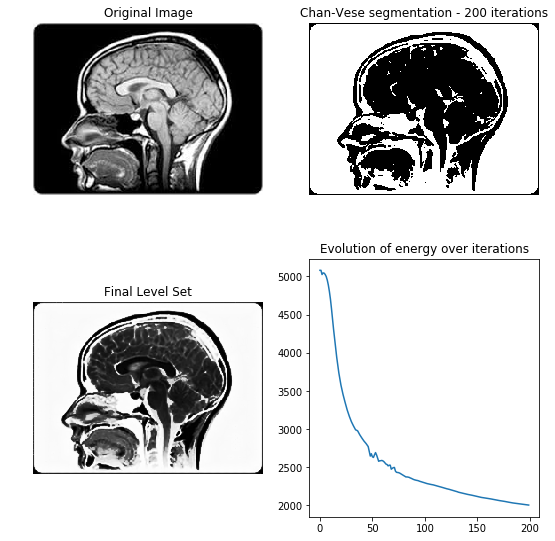

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, io
from skimage.segmentation import chan_vese


#image = img_as_float(data.camera())
image = io.imread("images/brain_mri.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.01, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

In [34]:
print(cv[1])
print(cv[2])

[[-5.71622447 -5.72751834 -5.73667629 ... -5.81805919 -5.77966673
  -5.76534088]
 [-5.72604022 -5.72374955 -5.76732954 ... -5.84389862 -5.84544755
  -5.83933353]
 [-5.75759548 -5.72093444 -5.754621   ... -5.8569297  -5.86295528
  -5.8476549 ]
 ...
 [-5.74346026 -5.78723608 -5.78838854 ... -5.87624656 -5.86538457
  -5.81525151]
 [-5.74412644 -5.78054865 -5.7788476  ... -5.87080952 -5.85909168
  -5.81377605]
 [-5.73750832 -5.74996262 -5.7884417  ... -5.15988235 -5.84755547
  -5.80697381]]
[5081.092468490222, 5081.116167852313, 5025.808988729751, 5046.852751088909, 5043.966447276683, 5027.049821081197, 4999.101518332606, 4952.568557138315, 4888.142908613132, 4804.992755294237, 4704.867388168729, 4579.938352902984, 4439.827162268616, 4306.613395974643, 4182.180002473333, 4056.1759314453807, 3939.847483920953, 3833.082346415156, 3737.5593218304725, 3654.171554510409, 3577.625497621712, 3514.6471048163694, 3453.565650886973, 3398.5558803877543, 3348.026366052789, 3297.8275501416306, 3248.832

In [31]:
import cv2
im = io.imread("images/brain_mri.jpg")
print(cv2.cvtColor(im, cv2.COLOR_RGB2GRAY).shape)
#print(image.shape)
print(indices.shape)

(194, 259)
(194, 259, 2)
